In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
import sys
sys.path.append("..")
from utils.loading_data  import load_to_df_from_csv
from utils.plotting import draw_histogram, plot_scatter

In [173]:
data = load_to_df_from_csv("../data/train.csv")
type(data)

pandas.core.frame.DataFrame

In [174]:
data.shape # 1039 rows (observations) and 14 columns (variables, 13 input variables and 1 dependent variable)

(1039, 14)

In [175]:
data.head()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,Female
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,Male
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,Male
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,Male
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,Male


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Number words female                   1039 non-null   int64  
 1   Total words                           1039 non-null   int64  
 2   Number of words lead                  1039 non-null   float64
 3   Difference in words lead and co-lead  1039 non-null   int64  
 4   Number of male actors                 1039 non-null   int64  
 5   Year                                  1039 non-null   int64  
 6   Number of female actors               1039 non-null   int64  
 7   Number words male                     1039 non-null   int64  
 8   Gross                                 1039 non-null   float64
 9   Mean Age Male                         1039 non-null   float64
 10  Mean Age Female                       1039 non-null   float64
 11  Age Lead         

Here we see that the training dataframe has no missing values. We also see the data type for each one of the features.
We have 3 different data types: dtypes: float64(6), int64(7), object(1). For object see --> <https://pbpython.com/currency-cleanup.html>

In [177]:
data.describe()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,2334.256015,11004.368624,4108.256978,2525.024062,7.767084,1999.862368,3.507218,4561.855630,111.149182,42.353766,35.929588,38.716073,35.486044
std,2157.216744,6817.397413,2981.251156,2498.747279,3.901439,10.406632,2.088526,3417.855987,151.761551,7.817110,8.957193,12.285902,12.046696
min,0.000000,1351.000000,318.000000,1.000000,1.000000,1939.000000,1.000000,0.000000,0.000000,19.000000,11.000000,11.000000,7.000000
25%,904.000000,6353.500000,2077.000000,814.500000,5.000000,1994.000000,2.000000,2139.500000,22.000000,37.480769,29.500000,30.000000,28.000000
50%,1711.000000,9147.000000,3297.000000,1834.000000,7.000000,2000.000000,3.000000,3824.000000,60.000000,42.600000,35.000000,38.000000,34.000000
75%,3030.500000,13966.500000,5227.000000,3364.000000,10.000000,2009.000000,5.000000,5887.500000,143.500000,47.333333,41.500000,46.000000,41.000000
max,17658.000000,67548.000000,28102.000000,25822.000000,29.000000,2015.000000,16.000000,31146.000000,1798.000000,71.000000,81.333333,81.000000,85.000000


In [178]:


np.set_printoptions(suppress=True, precision = 3)
a = data.describe()[7:8].to_numpy().reshape(-1, 1) # Notice that Lead variable does not appear
print(str(a).replace(' [', '').replace('[', '').replace(']', ''))

17658.   
67548.   
28102.   
25822.   
   29.   
 2015.   
   16.   
31146.   
 1798.   
   71.   
   81.333
   81.   
   85.   


In [179]:
data['Lead'].replace({'Male':1, 'Female':0}, inplace = True)
# When setting the argument inplace as True the DataFrame will be updated in place. 
# Otherwise, using inplace = False, which is the default value, would return a copy of the DataFrame.

In [180]:
data.info() # Now Lead is detected as an int dtype and it appears in the description (column Lead didn't appear in)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Number words female                   1039 non-null   int64  
 1   Total words                           1039 non-null   int64  
 2   Number of words lead                  1039 non-null   float64
 3   Difference in words lead and co-lead  1039 non-null   int64  
 4   Number of male actors                 1039 non-null   int64  
 5   Year                                  1039 non-null   int64  
 6   Number of female actors               1039 non-null   int64  
 7   Number words male                     1039 non-null   int64  
 8   Gross                                 1039 non-null   float64
 9   Mean Age Male                         1039 non-null   float64
 10  Mean Age Female                       1039 non-null   float64
 11  Age Lead         

In [181]:
data.describe()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,2334.256015,11004.368624,4108.256978,2525.024062,7.767084,1999.862368,3.507218,4561.855630,111.149182,42.353766,35.929588,38.716073,35.486044,0.755534
std,2157.216744,6817.397413,2981.251156,2498.747279,3.901439,10.406632,2.088526,3417.855987,151.761551,7.817110,8.957193,12.285902,12.046696,0.429977
min,0.000000,1351.000000,318.000000,1.000000,1.000000,1939.000000,1.000000,0.000000,0.000000,19.000000,11.000000,11.000000,7.000000,0.000000
25%,904.000000,6353.500000,2077.000000,814.500000,5.000000,1994.000000,2.000000,2139.500000,22.000000,37.480769,29.500000,30.000000,28.000000,1.000000
50%,1711.000000,9147.000000,3297.000000,1834.000000,7.000000,2000.000000,3.000000,3824.000000,60.000000,42.600000,35.000000,38.000000,34.000000,1.000000
75%,3030.500000,13966.500000,5227.000000,3364.000000,10.000000,2009.000000,5.000000,5887.500000,143.500000,47.333333,41.500000,46.000000,41.000000,1.000000
max,17658.000000,67548.000000,28102.000000,25822.000000,29.000000,2015.000000,16.000000,31146.000000,1798.000000,71.000000,81.333333,81.000000,85.000000,1.000000


# 1. Do men or women dominate speaking roles in Hollywood movies?

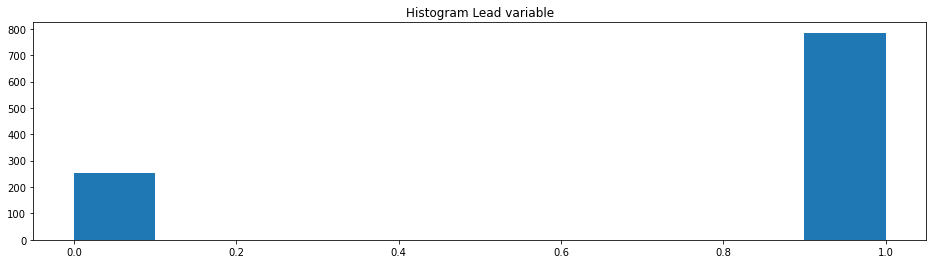

In [182]:
Lead = data['Lead']
plt.title('Histogram Lead variable')
_ = plt.hist(Lead)

In [183]:
np.mean(Lead) # Same value that we can observe in the previous descriptive table

0.7555341674687199

In [184]:
Lead.value_counts()

1    785
0    254
Name: Lead, dtype: int64

### a) Is there a balance in gender when it comes to the number of actors engaged in movies?

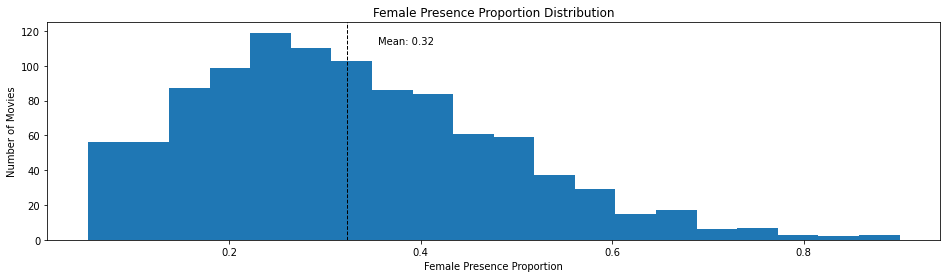

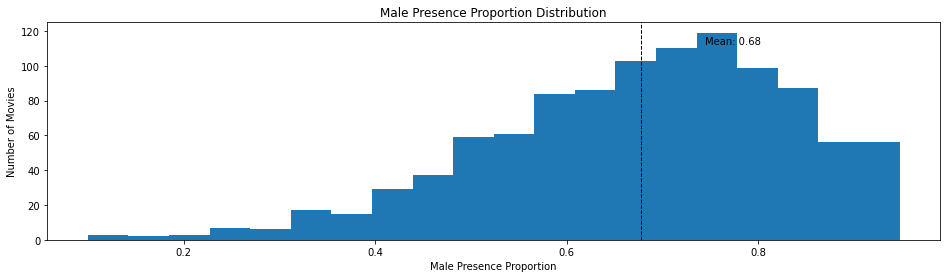

In [185]:
# Create a dataframe with number of male actors and number of female actors
gender_presence = data[["Number of male actors", "Number of female actors"]]

gender_presence["no_of_actors"] = data["Number of male actors"] + data["Number of female actors"]
gender_presence["female_presence"] = data["Number of female actors"] / gender_presence["no_of_actors"]
gender_presence["male_presence"] = data["Number of male actors"] / gender_presence["no_of_actors"]

draw_histogram(gender_presence.female_presence, 20, "Female Presence Proportion", "Number of Movies", "Female Presence Proportion Distribution", True)
draw_histogram(gender_presence.male_presence, 20, "Male Presence Proportion", "Number of Movies", "Male Presence Proportion Distribution", True)

### b) Is there a gender balance when it comes to the number of words spoken by actors in movies?

First we check if there is a balance in gender when it comes to the number of words spoken by actors without considering the gender composition of the actors involved in the movies.

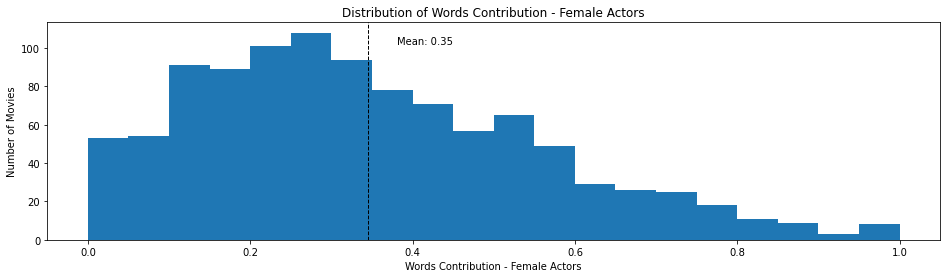

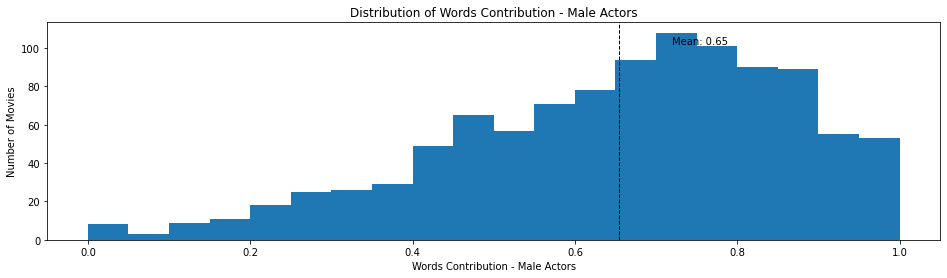

In [186]:
words_spoken = data[["Number words female", "Total words", "Number of words lead", "Number words male", "Number of male actors", "Number of female actors", "Lead"]]
words_spoken.rename(columns = {"Number words female": "number_words_female", "Number words male": "number_words_male", "Number of words lead": "number_words_lead", "Total words": "total_words", "Number of male actors": "male_actors", "Number of female actors": "female_actors", "Lead": "lead"}, inplace = True)

words_spoken["no_of_actors"] = words_spoken.male_actors + words_spoken.female_actors
words_spoken["female_presence"] = words_spoken.female_actors / words_spoken.no_of_actors
words_spoken["male_presence"] = words_spoken.male_actors / words_spoken.no_of_actors

# Adding lead's word count to respective gender
words_spoken.number_words_female = words_spoken.apply(lambda row : (row.number_words_female + row.number_words_lead) if row.lead == "Female" else row.number_words_female, axis = 1)
words_spoken.number_words_male = words_spoken.apply(lambda row : (row.number_words_male + row.number_words_lead) if row.lead == "Male" else row.number_words_male, axis = 1)

# Calculating the percentage word contribution for each gender
words_spoken["words_contribution_female"] = words_spoken.number_words_female / (words_spoken.number_words_female + words_spoken.number_words_male)
words_spoken["words_contribution_male"] = words_spoken.number_words_male / (words_spoken.number_words_female + words_spoken.number_words_male)

draw_histogram(words_spoken.words_contribution_female, 20, "Words Contribution - Female Actors", "Number of Movies", "Distribution of Words Contribution - Female Actors", True)
draw_histogram(words_spoken.words_contribution_male, 20, "Words Contribution - Male Actors", "Number of Movies", "Distribution of Words Contribution - Male Actors", True)

Then we check if there is a balance in gender when it comes to the number of words spoken by actors considering the gender composition of the actors involved in the movies. We do this by normalizing the total number of words spoken by each gender group (dividing the word contribution by the gender presence).

By normalizing, we try to understand how would the word contribution be distributed IF equal number of male and female actors were present.

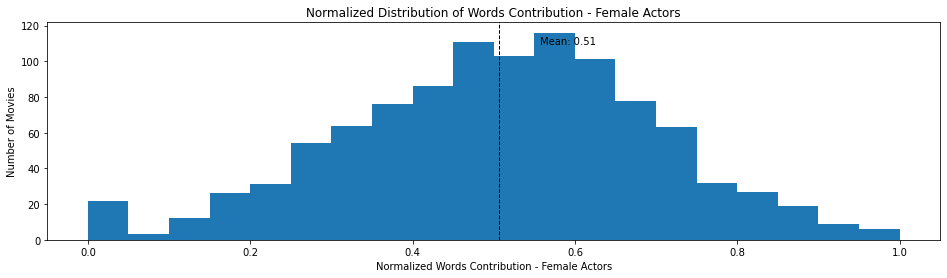

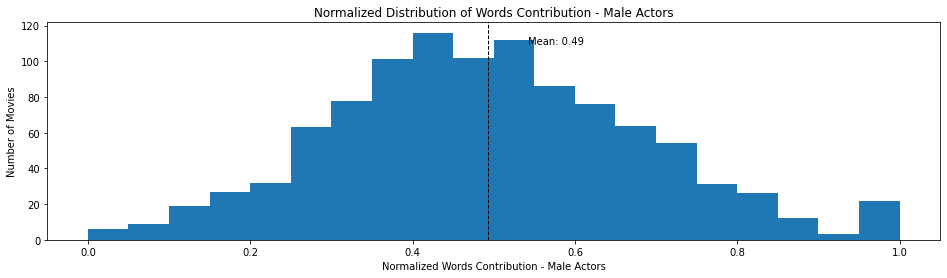

In [187]:
words_spoken_normalized = data[["Number words female", "Total words", "Number of words lead", "Number words male", "Number of male actors", "Number of female actors", "Lead"]]
words_spoken_normalized.rename(columns = {"Number words female": "number_words_female", "Number words male": "number_words_male", "Number of words lead": "number_words_lead", "Total words": "total_words", "Number of male actors": "male_actors", "Number of female actors": "female_actors", "Lead": "lead"}, inplace = True)

words_spoken_normalized["no_of_actors"] = words_spoken_normalized.male_actors + words_spoken_normalized.female_actors
words_spoken_normalized["female_presence"] = words_spoken_normalized.female_actors / words_spoken_normalized.no_of_actors
words_spoken_normalized["male_presence"] = words_spoken_normalized.male_actors / words_spoken_normalized.no_of_actors

# Adding lead's word count to respective gender
words_spoken_normalized.number_words_female = words_spoken_normalized.apply(lambda row : (row.number_words_female + row.number_words_lead) if row.lead == "Female" else row.number_words_female, axis = 1)
words_spoken_normalized.number_words_male = words_spoken_normalized.apply(lambda row : (row.number_words_male + row.number_words_lead) if row.lead == "Male" else row.number_words_male, axis = 1)

# Normalizing the words spoken based on presence
words_spoken_normalized.number_words_female = words_spoken_normalized.apply(lambda row: (row.number_words_female / row.female_presence) if row.female_presence > 0 else row.number_of_female, axis = 1)
words_spoken_normalized.number_words_male = words_spoken_normalized.apply(lambda row: (row.number_words_male / row.male_presence) if row.male_presence > 0 else row.number_of_male, axis = 1)

# Calculating the percentage word contribution for each gender
words_spoken_normalized["words_contribution_female"] = words_spoken_normalized.number_words_female / (words_spoken_normalized.number_words_female + words_spoken_normalized.number_words_male)
words_spoken_normalized["words_contribution_male"] = words_spoken_normalized.number_words_male / (words_spoken_normalized.number_words_female + words_spoken_normalized.number_words_male)

draw_histogram(words_spoken_normalized.words_contribution_female, 20, "Normalized Words Contribution - Female Actors", "Number of Movies", "Normalized Distribution of Words Contribution - Female Actors", True)
draw_histogram(words_spoken_normalized.words_contribution_male, 20, "Normalized Words Contribution - Male Actors", "Number of Movies", "Normalized Distribution of Words Contribution - Male Actors", True)

### Then we get a considerably balanced distribution. What these histograms shows is that even if there was an equal amount of male - female presence in movies (i.e. # of female actors = # of male actors), there is still a slight skewness in the distributions - which means that there is a slight male domination in speaking roles.

Hypothesis testing: A confidence interval, using hoeffdings inequality, is constructed for the mean difference in words spoken between males and females. This interval assumes that the data is representative of all hollywood movies. More precisely, we assume that the least and most possible differences in words spoken are given in the data.

In [188]:
for i in range(len(data)): #Loop to increment the lead words into female words or male words

    if data.loc[i,"Lead"]=="Female":

        data.loc[i,"Number words female"]=data.loc[i,"Number words female"]+data.loc[i,"Number of words lead"]
    else:
        data.loc[i,"Number words male"]=data.loc[i,"Number words male"]+data.loc[i,"Number of words lead"]

data["difference_words_m_f"]=data.iloc[:,7]-data.iloc[:,0] #Create new feature, the difference in words spoken between males and females.

#A confidence interval, using hoeffdings inequality, is constructed for the mean difference in words spoken between males and females. This interval assumes 
# that the data is representative of all hollywood movies. More precisely, we assume that the least and most possible differences in words spoken are given 
# in the data.

mean_difference=np.mean(data.difference_words_m_f)
def compute_epsilon(alpha,n,a,b):
    return np.sqrt((b-a)**2*np.log(2/alpha)/(2*n))
alpha = 0.05
n = len(data)
a = min(data.difference_words_m_f)
b = max(data.difference_words_m_f)
delta = compute_epsilon(alpha,n,a,b)
(mean_difference-delta,mean_difference+delta)
data

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead,difference_words_m_f
0,1512,6394,2251.0,343,2,1995,5,4882,142.0,51.500000,42.333333,46.0,65.0,0,3370
1,1524,8780,2020.0,1219,9,2001,4,7256,37.0,39.125000,29.333333,58.0,34.0,1,5732
2,155,4176,942.0,787,7,1968,1,4021,376.0,42.500000,37.000000,46.0,37.0,1,3866
3,1073,9855,3440.0,2623,12,2002,2,8782,19.0,35.222222,21.500000,33.0,23.0,1,7709
4,1317,7688,3835.0,3149,8,1988,4,6371,40.0,45.250000,45.000000,36.0,39.0,1,5054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,303,2398,1334.0,1166,5,1973,2,2095,174.0,43.200000,31.000000,46.0,24.0,1,1792
1035,632,8404,1952.0,187,6,1992,2,7772,172.0,37.166667,24.000000,21.0,34.0,0,7140
1036,1326,2750,877.0,356,2,2000,3,1424,53.0,27.500000,27.666667,28.0,25.0,1,98
1037,462,3994,775.0,52,8,1996,3,3532,32.0,42.857143,38.500000,29.0,32.0,0,3070


## 2. Has gender balance in speaking roles changed over time (i.e. years)?

In [189]:
df = data.drop(data[data.Lead == 0].index)

In [190]:
df.shape

(785, 15)

In [191]:
n = data.Year.unique()
n

array([1995, 2001, 1968, 2002, 1988, 1997, 1980, 1973, 1977, 1999, 1990,
       1984, 1992, 2000, 1989, 1996, 1994, 2003, 2006, 1993, 2010, 1985,
       2008, 2004, 2005, 2007, 1981, 1991, 1986, 2009, 1998, 1982, 1978,
       1987, 1960, 1975, 2013, 1983, 1939, 2011, 1979, 2012, 2014, 1972,
       1954, 1958, 1974, 1976, 1959, 2015, 1949])

In [192]:
df2 = data.drop(data[data.Lead == 1].index)
n2 = df2.Year.unique()
n2

array([1995, 1999, 1989, 1992, 2008, 2004, 1997, 1990, 2007, 2000, 2003,
       1996, 1991, 1984, 2009, 2002, 1986, 2006, 2001, 1993, 2005, 1939,
       1994, 1981, 2010, 2011, 1998, 2013, 2012, 2014, 1982, 1987, 1983,
       1958, 1988, 1980, 1973, 1977, 2015, 1959])

In [193]:
x = data['Year'].value_counts() # Number of Lead Male and Female grouped by year
y = df['Year'].value_counts() # Number of Lead Male by year
ratio = y/x # Gender ratio across the years

In [194]:
sum(x) # The sum all of the counts is equal to the length of the dataset, which makes sense.

1039

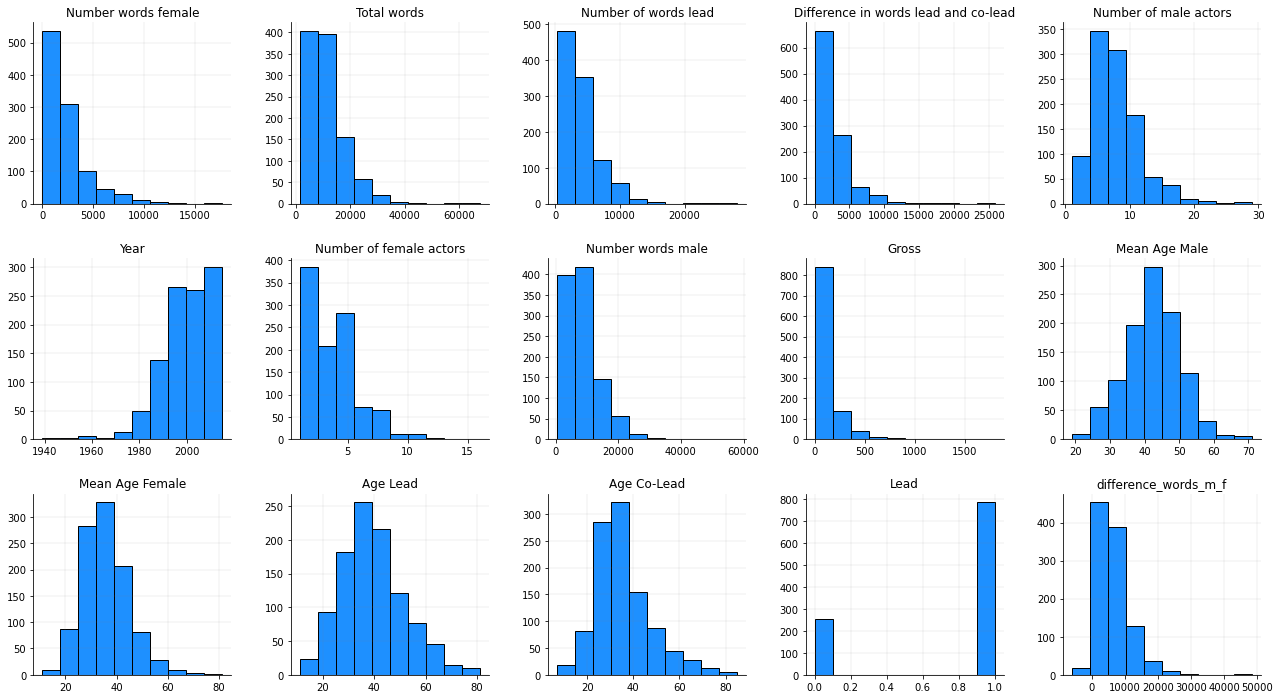

In [195]:
axes = data.hist(layout = (3,5), figsize = (22, 12), alpha = 1, color = "dodgerblue", edgecolor = "black", linewidth = 1)

axes = axes.flatten().tolist()

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color = 'grey', linestyle='-', linewidth = 0.25, alpha = 0.5)

    
plt.savefig("histograms.svg", format = "svg", dpi=300, transparent = True, bbox_inches = 'tight')
plt.show() 

In [196]:
data.columns


Index(['Number words female', 'Total words', 'Number of words lead',
       'Difference in words lead and co-lead', 'Number of male actors', 'Year',
       'Number of female actors', 'Number words male', 'Gross',
       'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead', 'Lead',
       'difference_words_m_f'],
      dtype='object')

In [197]:
df1 = data.drop(columns = ['Number words male', 'Gross',
       'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead', 'Lead'])
df2 = data.drop(columns = ['Number words female', 'Total words', 'Number of words lead',
       'Difference in words lead and co-lead', 'Number of male actors', 'Year',
       'Number of female actors'])

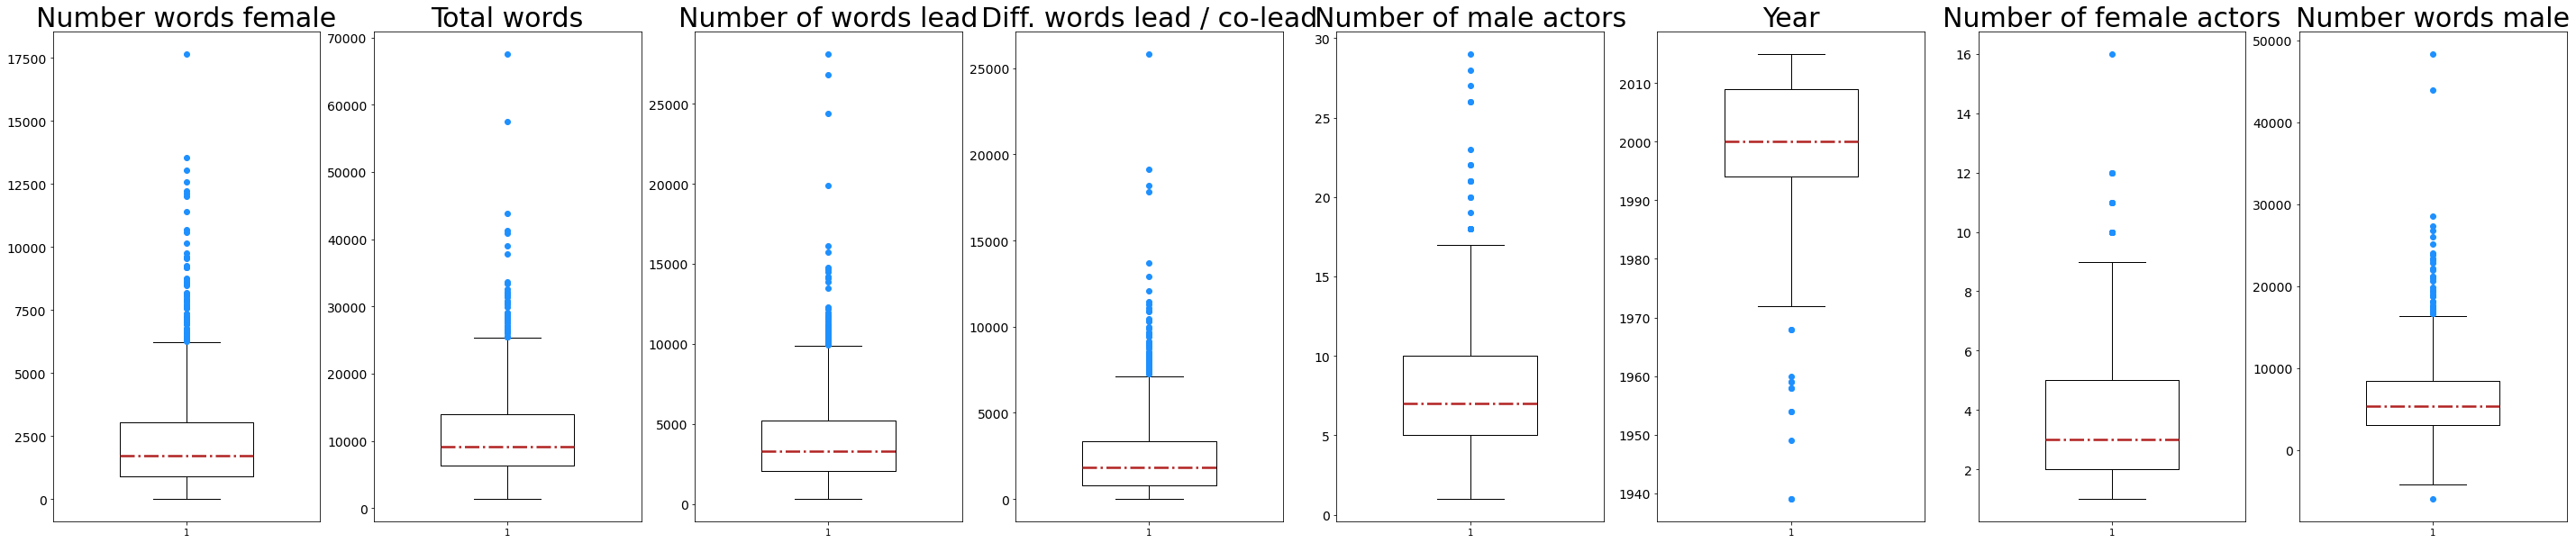

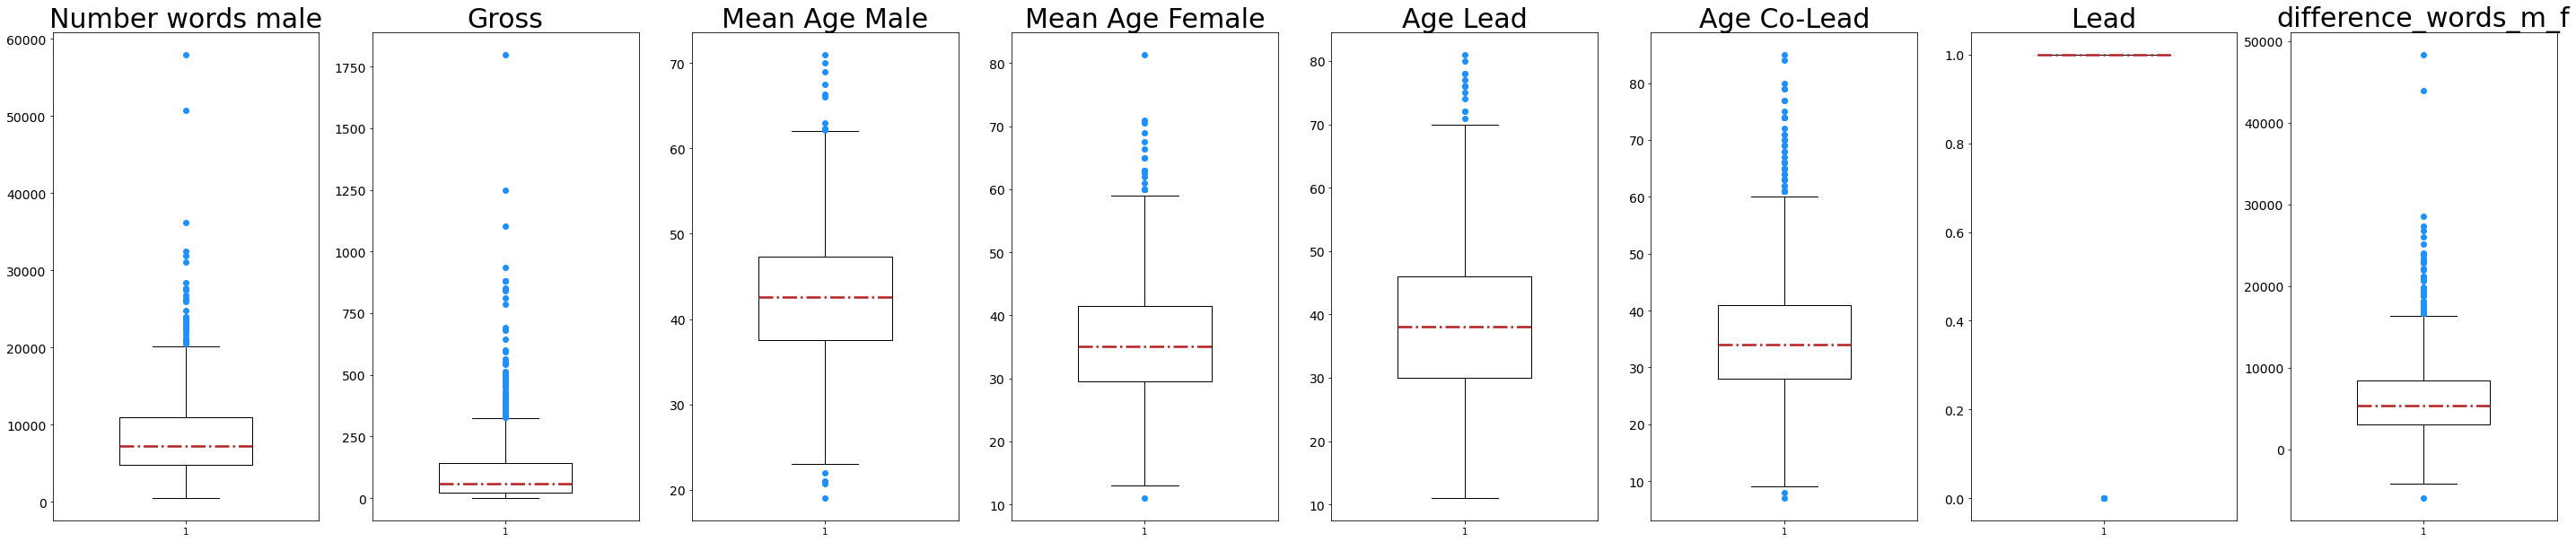

In [198]:
df1 = data.drop(columns = ['Number words male', 'Gross',
       'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead', 'Lead'])
df2 = data.drop(columns = ['Number words female', 'Total words', 'Number of words lead',
       'Difference in words lead and co-lead', 'Number of male actors', 'Year',
       'Number of female actors'])

red_circle = dict(markerfacecolor = "dodgerblue", marker = 'o', markeredgecolor = 'dodgerblue')
medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')

fig1, axs = plt.subplots(1, len(df1.columns), figsize = (50,10))


for i, ax in enumerate(axs.flat):
    ax.boxplot(df1.iloc[:,i], flierprops=red_circle, widths=0.5,  medianprops=medianprops)
    if (i==3):
        ax.set_title('Diff. words lead / co-lead', fontsize=30)
    else:
        ax.set_title(data.columns[i], fontsize=30)
    ax.tick_params(axis='y', labelsize = 14)


fig2, axs = plt.subplots(1, len(df2.columns), figsize = (50,10))



for i, ax in enumerate(axs.flat):
    ax.boxplot(df2.iloc[:,i], flierprops=red_circle, widths= 0.5, medianprops=medianprops)
    ax.set_title(df2.columns[i], fontsize=30)
    ax.tick_params(axis='y', labelsize = 14)

fig1.savefig("boxplots1.svg", format = "svg", dpi=300, transparent = True, bbox_inches = 'tight')
fig2.savefig("boxplots2.svg", format = "svg", dpi=300, transparent = True, bbox_inches = 'tight')

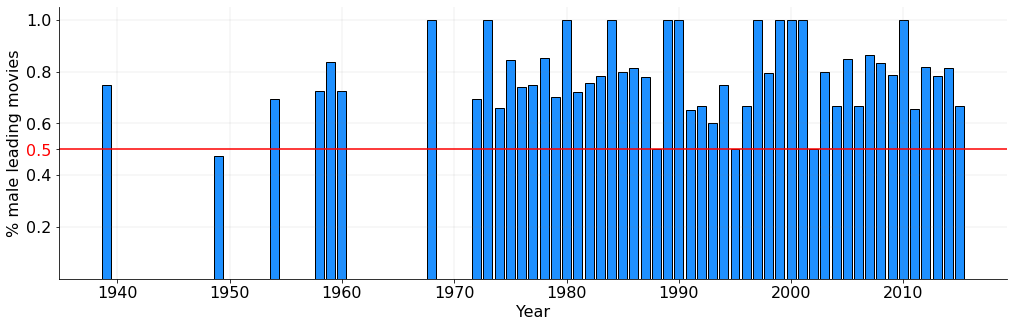

In [199]:
fig, ax = plt.subplots(figsize=(17, 5))

ax.set_yticks([0.2,0.4,0.5,0.6,0.8,1.0])
plt.gca().get_yticklabels()[2].set_color("red")


ax.bar(n, ratio, color="dodgerblue",
        edgecolor = "black", linewidth = 1)
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
#adds a title and axes labels
ax.set_xlabel('Year',  fontsize=16)
ax.set_ylabel('% male leading movies',  fontsize=16)

#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
#adds major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.savefig("years.svg", format = "svg", dpi=300, transparent = True, bbox_inches = 'tight')

### a) Based on the proportion of words spoken with respect to the gender of all actors (grouped and summed up to year)

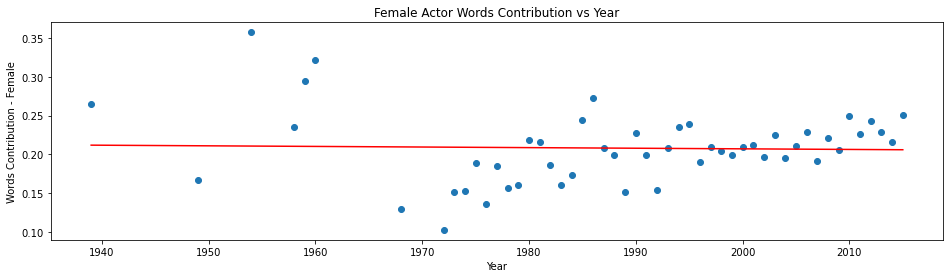

In [200]:
import matplotlib.pyplot as plt
import numpy as np

words_spoken_v2 = data[["Number words female", "Total words", "Number of words lead", "Number words male", "Number of male actors", "Number of female actors", "Lead", "Year"]]
words_spoken_v2.rename(columns = {"Number words female": "number_words_female", "Number words male": "number_words_male", "Number of words lead": "number_words_lead", "Total words": "total_words", "Number of male actors": "male_actors", "Number of female actors": "female_actors", "Lead": "lead", "Year": "year"}, inplace = True)

# Adding lead's word count to respective gender
words_spoken_v2.number_words_female = words_spoken_v2.apply(lambda row : (row.number_words_female + row.number_words_lead) if row.lead == "Female" else row.number_words_female, axis = 1)
words_spoken_v2.number_words_male = words_spoken_v2.apply(lambda row : (row.number_words_male + row.number_words_lead) if row.lead == "Male" else row.number_words_male, axis = 1)

# Grouping the dataset by year and summing across number of words for each gender
words_spoken_v2 = words_spoken_v2.groupby(["year"]).agg({'number_words_female': 'sum', 'number_words_male': 'sum', 'total_words': 'sum'}).reset_index()

# Calculating the words contribution for each gender
words_spoken_v2["words_contribution_female"] = words_spoken_v2.number_words_female / words_spoken_v2.total_words
words_spoken_v2["words_contribution_male"] = words_spoken_v2.number_words_male / words_spoken_v2.total_words

"""#find line of best fit
a, b = np.polyfit(words_spoken_v2.year, words_spoken_v2.words_contribution_female, 1)

#add points to plot
plt.scatter(words_spoken_v2.year, words_spoken_v2.words_contribution_female)

#add line of best fit to plot
plt.plot(words_spoken_v2.year, a*words_spoken_v2.year+b, color='red')

plt.xlabel("Year")
plt.ylabel("Words Contribution - Female")
plt.title("Female Actor Words Contribution vs Year")"""

plot_scatter(words_spoken_v2.year, words_spoken_v2.words_contribution_female, "Year", "Words Contribution - Female", "Female Actor Words Contribution vs Year", True)

### b) Based on the proportion of words spoken with respect to the gender of all actors

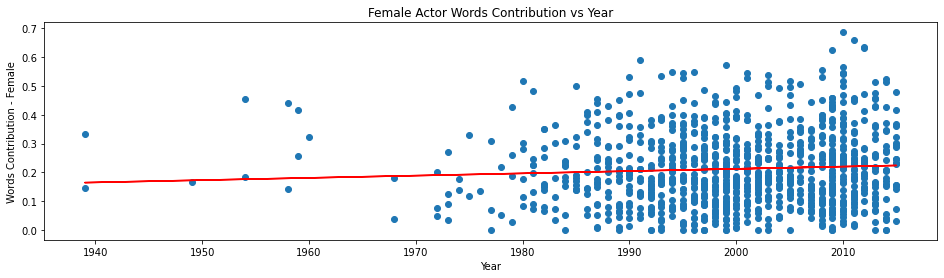

In [201]:
import matplotlib.pyplot as plt
import numpy as np

words_spoken_v2 = data[["Number words female", "Total words", "Number of words lead", "Number words male", "Number of male actors", "Number of female actors", "Lead", "Year"]]
words_spoken_v2.rename(columns = {"Number words female": "number_words_female", "Number words male": "number_words_male", "Number of words lead": "number_words_lead", "Total words": "total_words", "Number of male actors": "male_actors", "Number of female actors": "female_actors", "Lead": "lead", "Year": "year"}, inplace = True)

# Adding lead's word count to respective gender
words_spoken_v2.number_words_female = words_spoken_v2.apply(lambda row : (row.number_words_female + row.number_words_lead) if row.lead == "Female" else row.number_words_female, axis = 1)
words_spoken_v2.number_words_male = words_spoken_v2.apply(lambda row : (row.number_words_male + row.number_words_lead) if row.lead == "Male" else row.number_words_male, axis = 1)

# Calculating the words contribution for each gender
words_spoken_v2["words_contribution_female"] = words_spoken_v2.number_words_female / words_spoken_v2.total_words
words_spoken_v2["words_contribution_male"] = words_spoken_v2.number_words_male / words_spoken_v2.total_words

plot_scatter(words_spoken_v2.year, words_spoken_v2.words_contribution_female, "Year", "Words Contribution - Female", "Female Actor Words Contribution vs Year", True)

### Conclusion: There has been lower female engagement in movies when it comes to speaking roles, but across the years this seems to be increasing gradually.

 # Identify outliers via boxplots

In [202]:
# boxplot = data.boxplot(figsize = (15,10), rot = 0, fontsize= '8', grid = False, vert=False) # All boxplots together

In [203]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# variables = data.select_dtypes(exclude=['object'])

# for column in variables:
#         plt.figure(figsize=(15,3))
#         sns.boxplot(data=data, x=column)

# 3. Do films in which men do more speaking make a lot more money than films in which women speak more?

In [204]:
male = data.drop(data[data.Lead == 0].index) # Drop female values
female = data.drop(data[data.Lead == 1].index) # Drop male values

In [205]:
np.mean(male['Gross']), np.mean(female['Gross'])

(115.16305732484076, 98.74409448818898)

In [206]:
x1 = male.groupby(by='Year').agg('mean')['Gross']
x2 = female.groupby(by='Year').agg('mean')['Gross']
len(x2) # For some years there is no female Leading, we have to fill those years with 0's

40

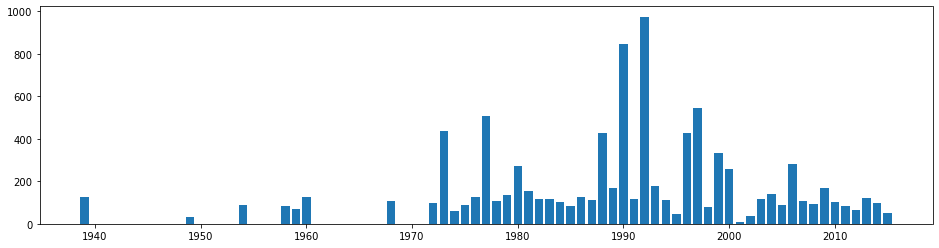

In [207]:
# Male gross salary evolution by year
plt.bar(n,x1)
plt.rcParams["figure.figsize"] = (16,4)

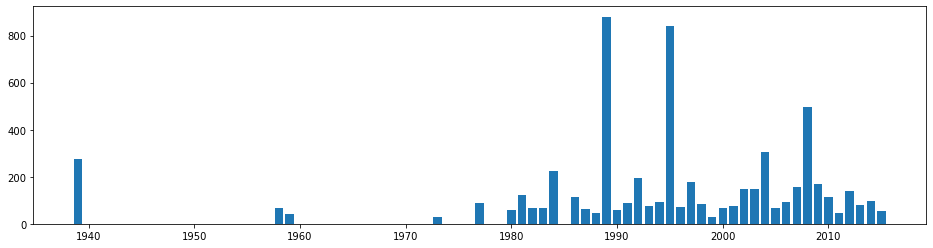

In [208]:
# Female gross salary evolution by year
female_years = female.Year.unique() # Years where we have female observations
plt.bar(female_years,x2)
plt.rcParams["figure.figsize"] = (16,4)

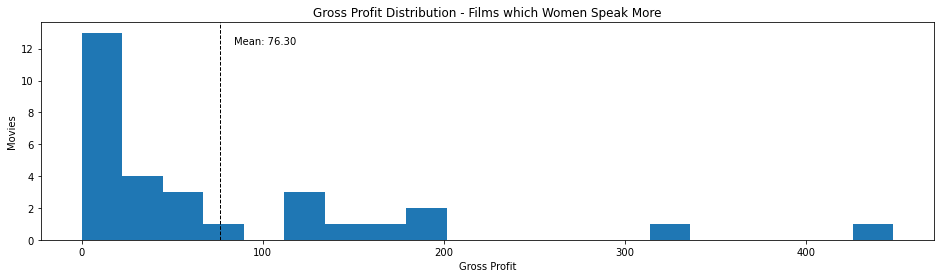

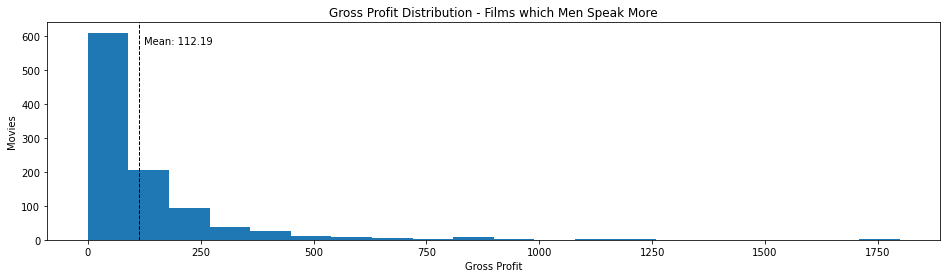

In [209]:
gross_distribution = data[["Number words female", "Total words", "Number of words lead", "Number words male", "Number of male actors", "Number of female actors", "Gross", "Lead"]]
gross_distribution.rename(columns = {"Number words female": "number_words_female", "Number words male": "number_words_male", "Number of words lead": "number_words_lead", "Total words": "total_words", "Number of male actors": "male_actors", "Number of female actors": "female_actors", "Gross": "gross", "Lead": "lead"}, inplace = True)

"""
STEPS:

1. Calculate total words by each gender per movie (including lead's)
2. Generate a column for speech dominating gender using number of words spoken
3. Draw histograms showing mean for each category
"""

# Adding lead's word count to respective gender
gross_distribution.number_words_female = gross_distribution.apply(lambda row : (row.number_words_female + row.number_words_lead) if row.lead == "Female" else row.number_words_female, axis = 1)
gross_distribution.number_words_male = gross_distribution.apply(lambda row : (row.number_words_male + row.number_words_lead) if row.lead == "Male" else row.number_words_male, axis = 1)

gross_distribution["speech_dominating_gender"] = gross_distribution.apply(lambda row: "Female" if row.number_words_female > row.number_words_male else "Male", axis = 1)

draw_histogram((gross_distribution.loc[gross_distribution.speech_dominating_gender == "Female"].gross), 20, "Gross Profit", "Movies", "Gross Profit Distribution - Films which Women Speak More", True)
draw_histogram((gross_distribution.loc[gross_distribution.speech_dominating_gender == "Male"].gross), 20, "Gross Profit", "Movies", "Gross Profit Distribution - Films which Men Speak More", True)

Hypothesis testing:

In [215]:

df = load_to_df_from_csv("../data/train.csv")

for i in range(len(df)): #Loop to increment the lead words into female words or male words

    if df.loc[i,"Lead"]=="Female":

        df.loc[i,"Number words female"]=df.loc[i,"Number words female"]+df.loc[i,"Number of words lead"]
    else:
        df.loc[i,"Number words male"]=df.loc[i,"Number words male"]+df.loc[i,"Number of words lead"]
df["difference_words_m_f"]=df.iloc[:,7]-df.iloc[:,0] #Create new feature, the difference in words spoken between males and females.


#A confidence interval, using hoeffdings inequality, is constructed for the Gross earnings in male speech dominating movies. This interval assumes that the 
# data is representative of all hollywood movies. More precisely, we assume that the least and most possible earnings for male dominating movies are given in 
# the data.

alpha = 0.05
n = len(df.loc[ df["difference_words_m_f"]>0 ])
a = min(df.loc[ df["difference_words_m_f"]>0 ,"Gross"])
b = max(df.loc[ df["difference_words_m_f"]>0 ,"Gross"])
delta = compute_epsilon(alpha,n,a,b)
mean_gross_male=np.mean(df.loc[ df["difference_words_m_f"]>0 ,"Gross"])
confidence_I_male=(mean_gross_male-delta,mean_gross_male+delta)


#A confidence interval, using hoeffdings inequality, is constructed for the Gross earnings in female speech dominating movies. This interval assumes that the 
# data is representative of all hollywood movies. More precisely, we assume that the least and most possible earnings for female dominating movies are given in 
# the data.

alpha = 0.05
n = len(df.loc[ df["difference_words_m_f"]<0 ])
a = min(df.loc[ df["difference_words_m_f"]<0 ,"Gross"])
b = max(df.loc[ df["difference_words_m_f"]<0 ,"Gross"])
delta = compute_epsilon(alpha,n,a,b)
mean_gross_female=np.mean(df.loc[ df["difference_words_m_f"]<0 ,"Gross"])
confidence_I_female=(mean_gross_female-delta,mean_gross_female+delta)
confidence_I_female,confidence_I_male #Overlapping


((-7.9947143408573, 172.69185719800015),
 (33.90865268094511, 200.05662509683265))

# Automatic profile report with pandas

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data, title='Dataset Profiling Report', infer_dtypes=False)
profile.to_notebook_iframe()
# profile.to_file("report.html")